In [1]:
# mount drive and change directory to project folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/520 Final Project"

/content/drive/.shortcut-targets-by-id/1KHBlsdIi36o_ikonJZ-usBVzGPrZlH0V/520 Final Project


In [ ]:
! pip install intervaltree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import intervaltree as it

In [ ]:
# load dataset .npz file
path = "musicnet.npz"
with np.load(path, allow_pickle=True, encoding='latin1') as data:
  audio, labels = data['1765']

In [ ]:
import scipy.io.wavfile
scipy.io.wavfile.read('musicnet/musicnet/train_data/1918.wav')

(44100, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [ ]:
audio.dtype

dtype('float64')

In [ ]:
# what files are in dataset
len(data.files)

330

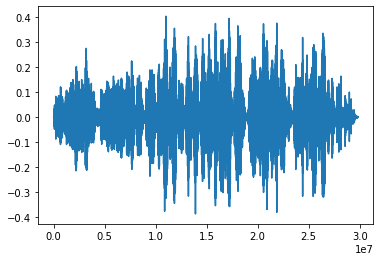

In [ ]:
import matplotlib.pyplot as plt

# first entry appears to be raw audio file in numpy array format
plt.plot(data['1765'][0])
plt.show()

(1025, 16650)


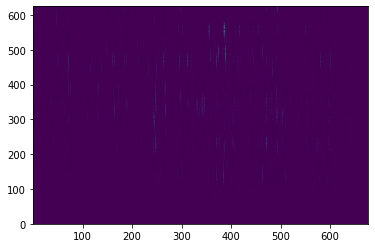

In [ ]:
# try fourier transforming
from scipy import signal
fs = 44100 # .wav file sampling frequency
audio = data['1765'][0]
f, t, Sxx = signal.spectrogram(audio, fs=fs, nperseg=2048)
print(Sxx.shape)
plt.pcolormesh(t, f[:30], Sxx[:30], shading='gouraud')
plt.show()

In [ ]:
# constant-Q transform
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


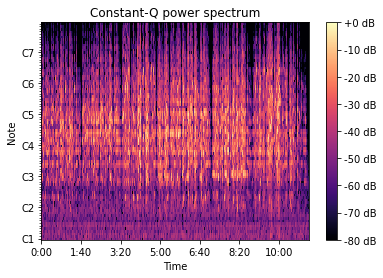

In [ ]:
# modified from documentation: https://librosa.org/doc/main/generated/librosa.cqt.html
import librosa
import librosa.display

C = np.abs(librosa.cqt(audio, sr=fs))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=fs, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show() # looks good, should maybe use this as input, at least to CNN version

In [ ]:
filenames = data.files
print(filenames)

['1788', '1789', '2659', '2127', '1818', '1819', '2614', '2138', '2297', '2131', '1812', '1775', '2322', '1777', '1776', '1771', '2325', '1772', '2486', '2487', '2564', '2529', '2528', '2480', '2481', '2154', '2155', '2156', '2157', '2150', '2151', '2244', '1752', '2247', '2158', '2159', '2242', '2243', '2466', '1759', '2462', '2463', '1793', '1792', '1791', '1790', '2562', '1757', '2210', '2619', '2106', '1859', '2294', '1755', '2555', '2550', '1829', '1828', '2318', '2319', '2491', '1824', '2314', '2315', '2313', '2310', '1822', '2411', '2397', '2392', '2393', '2390', '2140', '2283', '2194', '1750', '2149', '2148', '2477', '2476', '2492', '2473', '2472', '2471', '2289', '2147', '2557', '2568', '2494', '2209', '1922', '1923', '2497', '2542', '2540', '2195', '2556', '2410', '2300', '2303', '2302', '2305', '2304', '2307', '2228', '2381', '2177', '2383', '2382', '2384', '2389', '2415', '2178', '2179', '2077', '2076', '2075', '2288', '2443', '2607', '1742', '2444', '2603', '2608', '2282',

In [ ]:
import pandas as pd
metadata = pd.read_csv("musicnet_metadata.csv")
metadata.head(10)

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546
5,1734,Schubert,Piano Sonata in A major,3. Scherzo. Allegro vivace,Solo Piano,Museopen,Segundo G. Yogore,D959,325
6,1735,Schubert,Piano Sonata in A major,4. Rondo. Allegretto,Solo Piano,Museopen,Segundo G. Yogore,D959,714
7,1739,Schubert,Piano Trio in B-flat major,4. Rondo. Allegro vivace,Piano Trio,European Archive,harfesoft.de,OP99,490
8,1742,Schubert,String Quintet in C major,2. Adagio,Viola Quintet,European Archive,harfesoft.de,OP163,924
9,1749,Schubert,Piano Sonata in A minor,1. Moderato,Solo Piano,Museopen,Segundo G. Yogore,D845,696


In [ ]:
# get row by searching for song id
metadata.loc[metadata['id'] == 1759]

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
17,1759,Schubert,Piano Sonata in C minor,3. Menuetto and Trio,Solo Piano,Museopen,Martin Charles Bucknall,D958,194


In [ ]:
from os import listdir
from os.path import isfile, join
path = "musicnet/musicnet/train_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
print(files)

['1727.wav', '1728.wav', '1729.wav', '1730.wav', '1733.wav', '1734.wav', '1735.wav', '1739.wav', '1742.wav', '1749.wav', '1750.wav', '1751.wav', '1752.wav', '1755.wav', '1756.wav', '1757.wav', '1758.wav', '1760.wav', '1763.wav', '1764.wav', '1765.wav', '1766.wav', '1768.wav', '1771.wav', '1772.wav', '1773.wav', '1775.wav', '1776.wav', '1777.wav', '1788.wav', '1789.wav', '1790.wav', '1791.wav', '1792.wav', '1793.wav', '1805.wav', '1807.wav', '1811.wav', '1812.wav', '1813.wav', '1817.wav', '1818.wav', '1822.wav', '1824.wav', '1828.wav', '1829.wav', '1835.wav', '1859.wav', '1872.wav', '1873.wav', '1876.wav', '1893.wav', '1916.wav', '1918.wav', '1919.wav', '1922.wav', '1923.wav', '1931.wav', '1932.wav', '1933.wav', '2075.wav', '2076.wav', '2077.wav', '2078.wav', '2079.wav', '2080.wav', '2081.wav', '2082.wav', '2083.wav', '2104.wav', '2105.wav', '2112.wav', '2113.wav', '2114.wav', '2116.wav', '2117.wav', '2118.wav', '2119.wav', '2127.wav', '2131.wav', '2138.wav', '2140.wav', '2147.wav', '21

In [ ]:
# original musicnet paper segments file into  16,384-sample windows and marks note as present if being played in middle of window, so we do the same...
# just for 1759 first
audio = data['1759'][0]
windowsize = 16384
stepsize = int(windowsize/2)
splits = []
for i in range(0,len(audio)-windowsize, stepsize):
    splits += [audio[i:i+windowsize]]
splits = np.array(splits)

In [ ]:
tree = data['1759'][1]

In [ ]:
# get corresponding labels
NUM_NOTES = 128
labels = []
for i in range(0,len(audio)-windowsize, stepsize):
    middle = i + int(stepsize/2)
    indices = []
    for interval in list(tree[middle]):
        indices += [interval[2][1]]
    onehot = np.zeros(NUM_NOTES)
    onehot[indices] = 1
    labels += [onehot]
labels = np.array(labels)

In [ ]:
# do this for every song in training set
import scipy.io.wavfile
X_train = []
y_train = []
NUM_NOTES = 128
windowsize = 16384
stepsize = windowsize
for filename in files[:50]:
    songnumber = filename.split('.')[0]
    print(songnumber)
    with np.load("musicnet.npz", allow_pickle=True, encoding='latin1') as data:
      tree = data[songnumber][1]
    _, audio = scipy.io.wavfile.read('musicnet/musicnet/train_data/' + filename)
    for i in range(0,len(audio)-windowsize, stepsize):
        X_train += [audio[i:i+windowsize]]
        middle = i + int(windowsize/2)
        indices = []
        for interval in list(tree[middle]):
            indices += [interval[2][1]]
        onehot = np.zeros(NUM_NOTES)
        onehot[indices] = 1
        y_train += [onehot]
X_train = np.array(X_train)
y_train = np.array(y_train)

1727
1728
1729
1730
1733
1734
1735
1739
1742
1749
1750
1751
1752
1755
1756
1757
1758
1760
1763
1764
1765
1766
1768
1771
1772
1773
1775
1776
1777
1788
1789
1790
1791
1792
1793
1805
1807
1811
1812
1813
1817
1818
1822
1824
1828
1829
1835
1859
1872
1873


In [ ]:
import sys
print(X_train.shape)
print(sys.getsizeof(X_train)/1024/1024/1024) # size of X_train in gigabytes
print(sys.getsizeof(y_train)/1024/1024/1024) # size of y_train in gigabytes
X_train

(63353, 16384)
3.866760365664959
0.06041824072599411


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.00167847, -0.00326538],
       [-0.00500488, -0.00668335, -0.00820923, ..., -0.00769043,
        -0.00772095, -0.00787354],
       [-0.00775146, -0.00753784, -0.00735474, ...,  0.01000977,
         0.009552  ,  0.0093689 ],
       ...,
       [ 0.04730225,  0.04620361,  0.0458374 , ..., -0.00253296,
        -0.00241089, -0.00216675],
       [-0.00198364, -0.00177002, -0.00158691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [ ]:
print(y_train.shape, X_train.shape)

(417, 128) (417, 16384)


In [ ]:
from sklearn.datasets import make_multilabel_classification

X, y = make_multilabel_classification(n_classes=3, random_state=0)
clf = MultiOutputClassifier(LogisticRegression()).fit(X, y)
clf.score(X,y)

(100, 20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

X_appended = np.vstack([X_train, np.zeros(16384)]) # throws error if some columns have no positive entries, which unsurprisingly is the case in this toy example
y_appended = np.vstack([y_train, np.ones(128)])

model = MultiOutputClassifier(LogisticRegression())
model.fit(X_appended, y_appended)
model.score(X_train, y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


0.8057553956834532

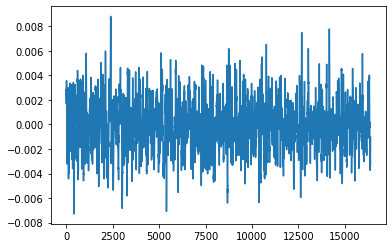

In [ ]:
# visualize learned weights

import matplotlib.pyplot as plt
plt.plot(model.estimators_[64].coef_[0])

In [ ]:
import pickle
with open('train_idx_to_files.pkl', 'rb') as f:
    train_idx_to_files = pickle.load(f)
with open('test_idx_to_files.pkl', 'rb') as f:
    test_idx_to_files = pickle.load(f)

In [ ]:
# Make PyTorch dataset class for the dataset
import os
import pandas as pd
import numpy as np
import intervaltree as it
import torch
from os import listdir
from os.path import isfile, join
from torch.utils.data import Dataset

class MusicnetDataset(Dataset):
    def __init__(self, metadata_file, audio_dir, data_file, windowsize, stepsize, idx_to_files):
        self.NUM_NOTES = 128
        self.metadata = pd.read_csv(metadata_file)
        self.img_dir = audio_dir
        self.filenames = [f for f in listdir(audio_dir) if isfile(join(audio_dir, f))]
        self.data = np.load(data_file, allow_pickle=True, encoding='latin1')
        self.indices_to_files = idx_to_files
        self.len = self.indices_to_files.end()
        self.windowsize = windowsize
        self.stepsize = stepsize
        # for file in self.filenames:
        #     audiolen = len(data[file.split('.')[0]][0])
        #     newlen = self.len + len(range(0,audiolen-self.windowsize, self.stepsize))
        #     self.indices_to_files[self.len:newlen] = (file.split('.')[0], self.len)
        #     self.len = newlen

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        filename, start_idx = list(self.indices_to_files[idx])[0][2]
        start_time = (idx - start_idx)*self.stepsize
        file = self.data[filename]
        # get audio clip
        audio = file[0][start_time:start_time+windowsize]
        # get relevant label
        middle = start_time + int(stepsize/2)
        indices = []
        for interval in list(file[1][middle]):
            indices += [interval[2][1]]
        label = np.zeros(self.NUM_NOTES)
        label[indices] = 1
        return audio, label

In [ ]:
windowsize = 16384
stepsize = int(windowsize/2)
train_set = MusicnetDataset("musicnet_metadata.csv", "musicnet/musicnet/train_data/", "musicnet.npz", windowsize, stepsize, train_idx_to_files)
test_set = MusicnetDataset("musicnet_metadata.csv", "musicnet/musicnet/test_data/", "musicnet.npz", windowsize, stepsize, test_idx_to_files)

In [ ]:
import pickle
# to make data loading more efficient, make each snippet of audio its own file:
windowsize = 16384
stepsize = windowsize*10
j = 0
labels = []
NUM_NOTES = 128
for filename in files:
    audio, tree = data[filename.split('.')[0]]
    for i in range(0,len(audio)-windowsize, stepsize):
        with open('musicnet_train_snippets/' + str(j) + '.pkl', 'wb') as f:
            pickle.dump(audio[i:i+windowsize], f)
        middle = i + int(stepsize/2)
        indices = []
        for interval in list(tree[middle]):
            indices += [interval[2][1]]
        onehot = np.zeros(NUM_NOTES)
        onehot[indices] = 1
        labels += [onehot]
        j += 1
labels = np.array(labels)

In [ ]:
len(labels)

4.004638671875

In [ ]:
labels.shape

(32806, 128)

In [ ]:
with open('train_labels.pkl', 'wb') as f:
  pickle.dump(labels, f)